<a href="https://colab.research.google.com/github/vmatam7/hds5210/blob/main/week12/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [40]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('condemn.csv')
condemnations.shape

<ipython-input-40-d28696efaa16>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('condemn.csv')


(32586, 40)

In [41]:
# Convert InspectDate to datetime format
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter for dates between 1986 and 2014
condemnations = condemnations[(condemnations['InspectDate'].dt.year >= 1986) &
                              (condemnations['InspectDate'].dt.year <= 2014)]

# Display the filtered dataframe
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [42]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [43]:
import numpy as np

# Add a new column for the year extracted from InspectDate
condemnations['Year'] = condemnations['InspectDate'].dt.year

# Pivot the data to summarize counts of each Status by year
by_year = pd.pivot_table(
    condemnations,
    index='Year',          # Rows will be each unique year
    columns='Status',      # Columns will be each unique value in Status
    values='InspectDate',  # We'll count the entries in InspectDate to get the number of condemnations
    aggfunc=np.ma.count    # Use np.ma.count as the aggregation function
)

# Fill NaN values with 0 (in case some years have no condemnations for a particular status)
by_year = by_year.fillna(0)

# Display the pivot table
by_year.head()


<ipython-input-43-a57c8c07064d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condemnations['Year'] = condemnations['InspectDate'].dt.year


Status,B,L,R,W
Year,,,,
1986,22.0,12.0,19.0,112.0
1987,91.0,20.0,8.0,361.0
1988,215.0,16.0,15.0,297.0
1989,277.0,15.0,11.0,432.0
1990,119.0,29.0,8.0,322.0


In [44]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

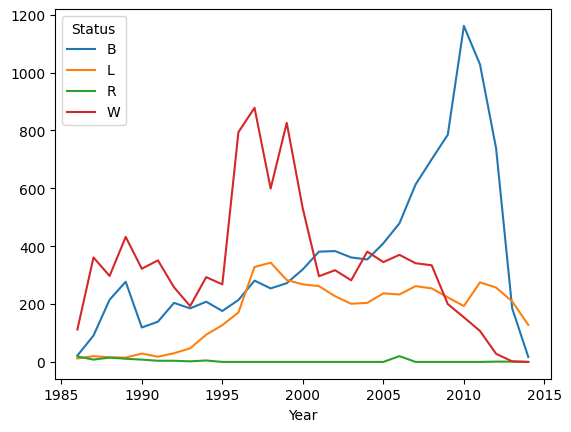

In [45]:
%matplotlib inline
by_year.plot()

---

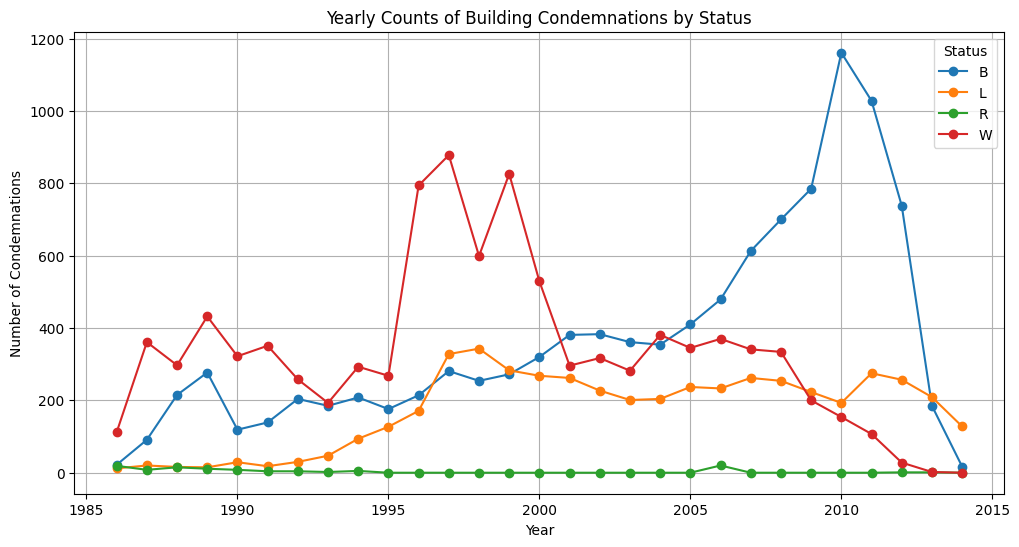

In [46]:
import matplotlib.pyplot as plt

# Plot the pivot table with a multi-series line chart
by_year.plot(figsize=(12, 6), marker='o')
plt.title("Yearly Counts of Building Condemnations by Status")
plt.xlabel("Year")
plt.ylabel("Number of Condemnations")
plt.legend(title="Status")
plt.grid(True)
plt.show()


# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [47]:
import pandas as pd

# Load the data from the CSV file
file_path = 'meetings.csv'
meetings = pd.read_csv(file_path)

# Create the startDate column by extracting the date part from startTime
meetings['startDate'] = meetings['startTime'].str[0:10]


In [48]:
# Convert startDate to datetime to facilitate filtering
meetings['startDate'] = pd.to_datetime(meetings['startDate'], errors='coerce')

# Define date ranges for BEFORE and DURING periods
before_filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
during_filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')

# Create the Period column and assign values based on the filters
meetings.loc[before_filter, 'Period'] = 'BEFORE'
meetings.loc[during_filter, 'Period'] = 'DURING'

# Create the pivot table to count the number of meetings hosted by each user for each period
summary = pd.pivot_table(
    meetings,
    index='userName',      # Rows will be each user
    columns='Period',      # Columns will be 'BEFORE' and 'DURING'
    values='meetingId',    # Use meetingId to count occurrences (assuming meetingId uniquely identifies each meeting)
    aggfunc='count',       # Count the number of meetings
    fill_value=0           # Fill NaN values with 0 for users with no meetings in a given period
)

# Rename columns to 'Before' and 'During'
summary.columns = ['Before', 'During']
# Calculate the percent change from Before to During
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before'].replace(0, np.nan)) * 100
summary['pctChange'] = summary['pctChange'].fillna(0)  # Handle division by zero by filling NaN with 0
import pandas as pd
import numpy as np

# Load data
file_path = 'meetings.csv'
meetings = pd.read_csv(file_path)

# Extract startDate and define periods
meetings['startDate'] = pd.to_datetime(meetings['startTime'].str[0:10], errors='coerce')
before_filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
during_filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')
meetings.loc[before_filter, 'Period'] = 'BEFORE'
meetings.loc[during_filter, 'Period'] = 'DURING'

# Pivot table for summary
summary = pd.pivot_table(meetings, index='userName', columns='Period', values='meetingId', aggfunc='count', fill_value=0)
summary.columns = ['Before', 'During']


# Correct pctChange calculation with handling for 0 in 'Before' column
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before'].replace(0, np.nan)) * 100

# Fill any remaining NaN values in pctChange with 0, as these indicate no change or no meetings in 'Before'
summary['pctChange'] = summary['pctChange'].fillna(0)

# Check the mean value of pctChange
mean_pct_change = summary['pctChange'].mean().round(2)
print("Mean pctChange:", mean_pct_change)

# Display the summary
summary.head()



Mean pctChange: 91.52


,Before,During,pctChange
userName,,,
Drew.Marco,12,19,58.333333
amit.bhagat,17,30,76.470588
andrea.bryant.amitechsolutions,5,3,-40.000000
angie.warren,5,9,80.000000
chris.rogers.amitechsolutions,4,3,-25.000000


---

In [49]:
assert(len(summary) == 22)


In [50]:
# Step 1: Inspect Before and During values in summary DataFrame
print("Summary DataFrame with Before and During counts:\n", summary.head())

# Step 2: Manually calculate mean pctChange for inspection
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before'].replace(0, np.nan)) * 100
summary['pctChange'] = summary['pctChange'].fillna(0)  # Handle cases where Before is 0

# Step 3: Calculate and print mean of pctChange
mean_pct_change = summary['pctChange'].mean()
print("Calculated Mean pctChange:", mean_pct_change)

# Step 4: Attempt assertion again with more context in case of failure
try:
    assert(mean_pct_change.round(2) == 0.92)
    print("Assertion passed: Mean pctChange is 0.92")
except AssertionError:
    print(f"AssertionError: Expected mean pctChange of 0.92, but got {mean_pct_change.round(2)}")





Summary DataFrame with Before and During counts:
                                 Before  During  pctChange
userName                                                 
Drew.Marco                          12      19  58.333333
amit.bhagat                         17      30  76.470588
andrea.bryant.amitechsolutions       5       3 -40.000000
angie.warren                         5       9  80.000000
chris.rogers.amitechsolutions        4       3 -25.000000
Calculated Mean pctChange: 91.5164339780708
AssertionError: Expected mean pctChange of 0.92, but got 91.52




---



## Submitting Your Work

Submit as usual
